# Текстовое описание данных

Набор данных: https://www.kaggle.com/spscientist/students-performance-in-exams 


Содержит следующие колонки: 


*   gender - пол (М = 1, Ж = 0)
*   race/ethnicity - раса (5 групп)
*   parental level of education - уровень образования родителей
*   lunch - обед перед тестированием ( стандарный = 1, нет/уменьшенный = 0)
*   test preparation course - подготовка к тесту (завершена = 0, незавершена = 1)
*   math score - балл по математике
*   reading score - балл по чтению
*   writing score - балл по письму



# Импорт библиотек

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.listdir('/content/drive/My Drive/Colab Notebooks/')

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv', sep=",")

Mounted at /content/drive


# Основные характеристики датасета


In [0]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,1,72,72,74
1,0,2,some college,1,0,69,90,88
2,0,1,master's degree,1,1,90,95,93
3,1,0,associate's degree,0,1,47,57,44
4,1,2,some college,1,1,76,78,75


In [0]:
data.shape

(1000, 8)

In [0]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [0]:
data.dtypes

gender                          int64
race/ethnicity                  int64
parental level of education    object
lunch                           int64
test preparation course         int64
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [0]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


In [0]:
data['test preparation course'].unique()

array([1, 0])

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['race/ethnicity'] = labelencoder.fit_transform(data['race/ethnicity'])
data['gender'] = labelencoder.fit_transform(data['gender'])
data['lunch'] = labelencoder.fit_transform(data['lunch'])
data['test preparation course'] = labelencoder.fit_transform(data['test preparation course'])

In [0]:
# Основные статистические характеристки набора данных
data.describe()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,1.000000,1.000000,100.00000,100.000000,100.000000


# Информация о корреляции признаков

In [0]:
data.corr()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,0.046563,-0.017508,0.216415,0.145253,0.165691
lunch,0.021372,0.046563,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,0.245769,-0.312946,0.802642,0.954598,1.000000


# Визуальное исследование датасета

## Диаграмма рассеяния

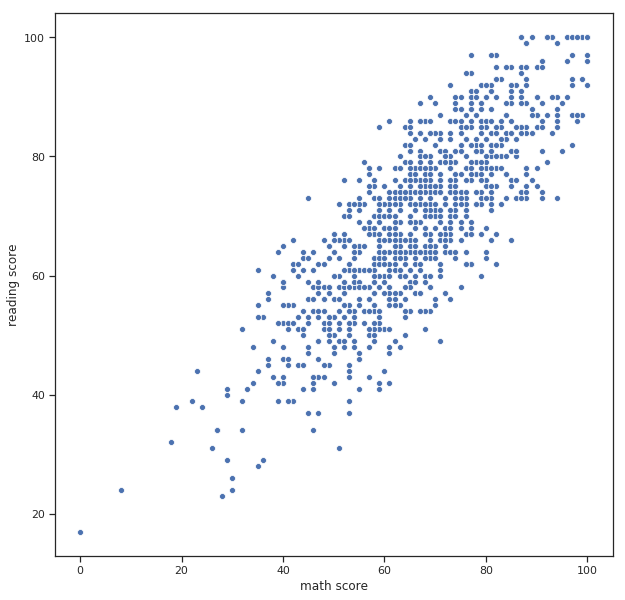

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='math score', y='reading score', data=data)

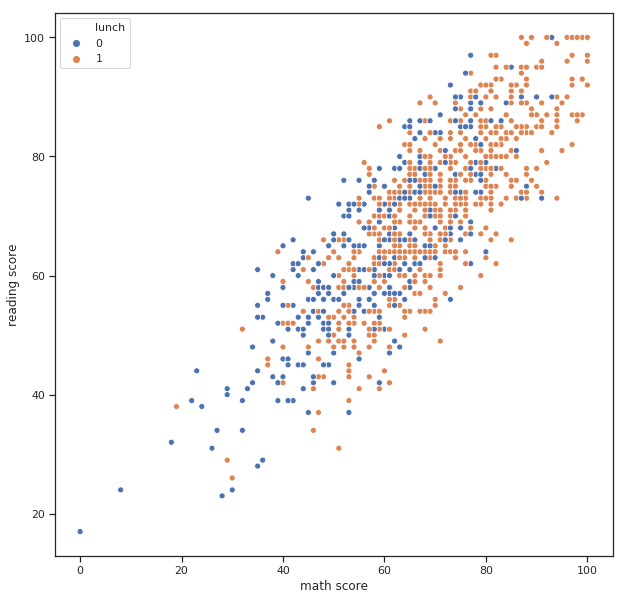

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='math score', y='reading score', data=data, hue = 'lunch')

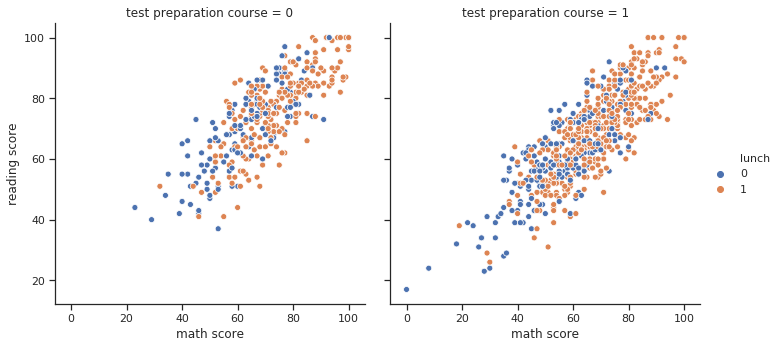

In [0]:
sns.relplot(x='math score', y='reading score', data=data, hue = 'lunch', col = 'test preparation course')

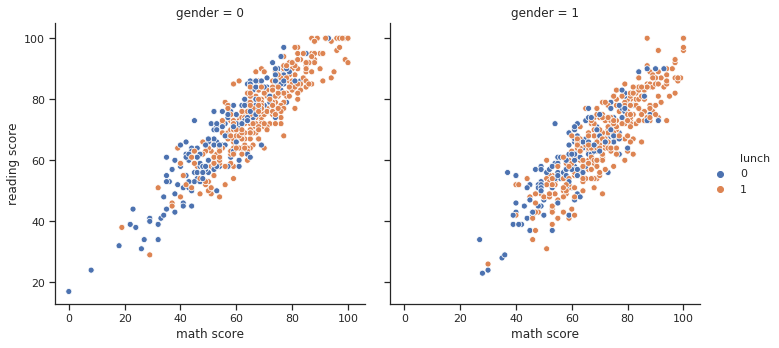

In [0]:
sns.relplot(x='math score', y='reading score', data=data, hue = 'lunch', col = 'gender')

## **Jointplot**

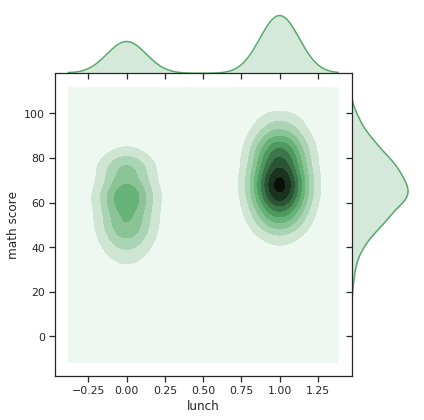

In [0]:
sns.jointplot(x='lunch', y='math score', data=data, kind="kde", space=0, color="g")

## Парные диаграммы

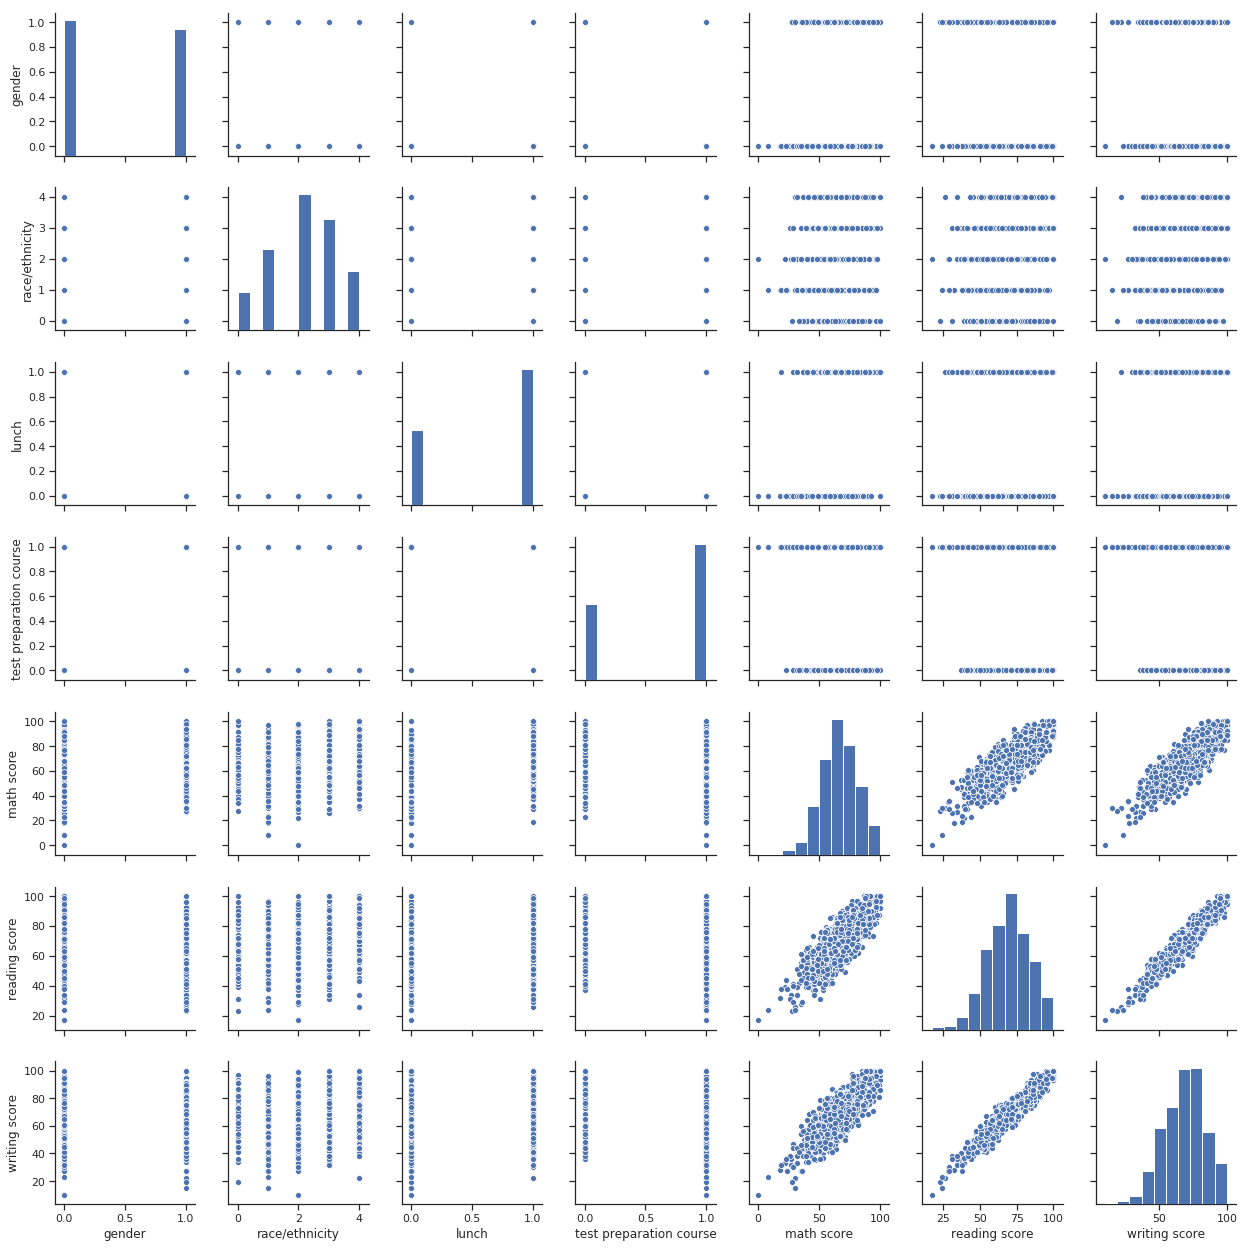

In [0]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


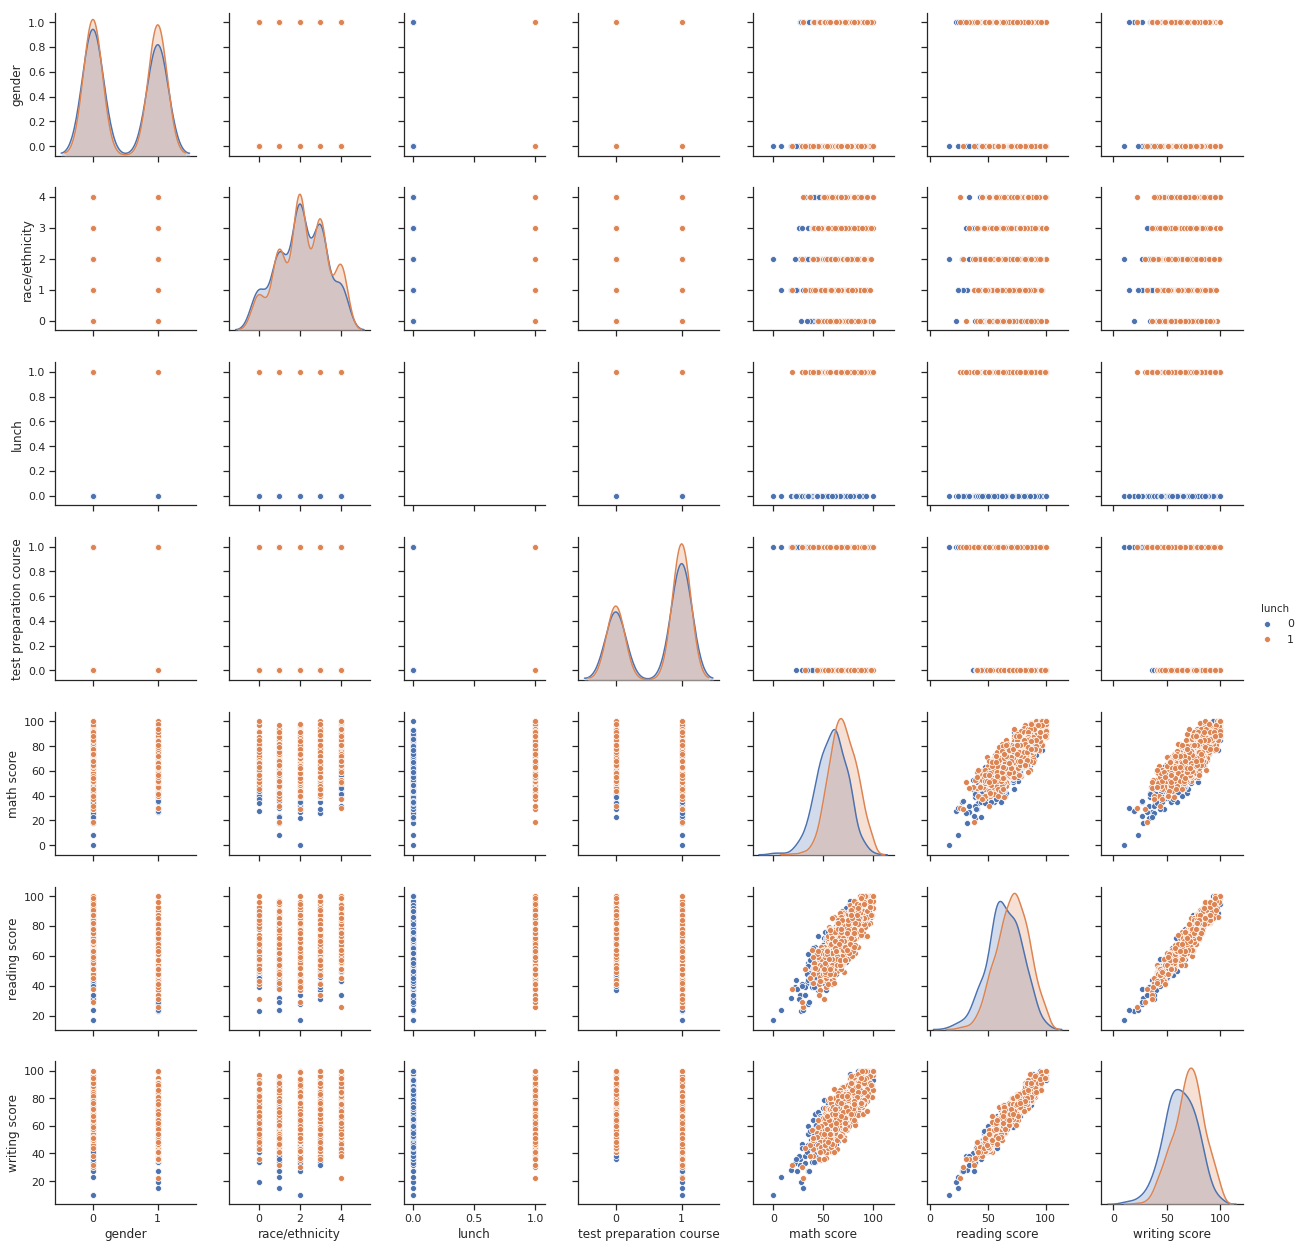

In [0]:
sns.pairplot(data, hue = "lunch")

## Ящик с усами

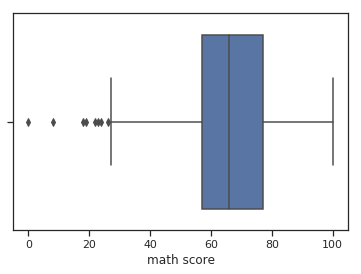

In [0]:
sns.boxplot(x=data['math score'])

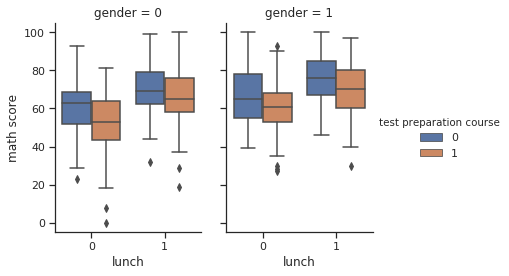

In [0]:
sns.catplot(x='lunch', y='math score', hue ='test preparation course', col = 'gender', data=data, kind="box", height=4, aspect=.7)

## Violin plot

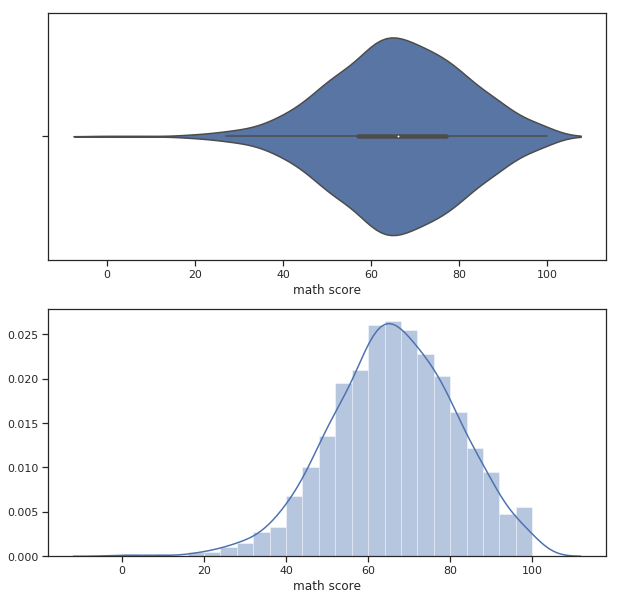

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x='math score', data=data)
sns.distplot(data['math score'], ax=ax[1])

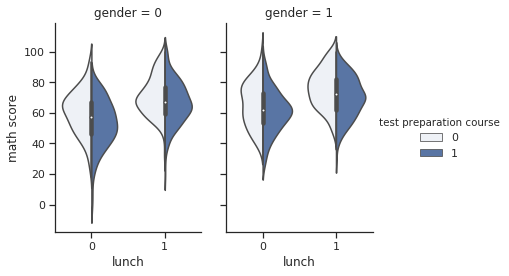

In [0]:
sns.catplot(x="lunch", y="math score", hue ='test preparation course', col = 'gender', color = 'b', data=data, kind="violin", split=True, height=4, aspect=.7);

In [0]:
!ipython nbconvert —to html "/content/drive/My Drive/Colab Notebooks/LR1.ipynb"

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] WARNING | pattern u'\u2014to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/LR1.ipynb to html
[NbConvertApp] Writing 1363388 bytes to /content/drive/My Drive/Colab Notebooks/LR1.html
